In [357]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [358]:

#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
"""
def sigmoid(z):
    return 1 / (1 + np.power(np.e, -1.0 * z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / predict.shape[0]

In [359]:

# He initialization
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size) 
        W = np.random.randn(i_size, layer_output_size) * std  #Making sure the shapes macth
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

#Computing gradients
def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads


In [360]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')

X = data
print(X)
X = data.drop('quality', axis=1).values
y = data['quality'].values.astype(float)           # regression target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#STANDARDIZE FEATURES 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

#Reshape targets to (n_samples, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

print(y)
print(y.shape)
print(x_train.shape)
print(y_train.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

Epoch 1, Train MSE: 0.7720, Test MSE: 0.7553, R2: 0.0248
Epoch 2, Train MSE: 0.7616, Test MSE: 0.7515, R2: 0.0297
Epoch 3, Train MSE: 0.7537, Test MSE: 0.7443, R2: 0.0390
Epoch 4, Train MSE: 0.7479, Test MSE: 0.7299, R2: 0.0576
Epoch 5, Train MSE: 0.7359, Test MSE: 0.7254, R2: 0.0633
Epoch 6, Train MSE: 0.7267, Test MSE: 0.7121, R2: 0.0805
Epoch 7, Train MSE: 0.7187, Test MSE: 0.7068, R2: 0.0873
Epoch 8, Train MSE: 0.7107, Test MSE: 0.6972, R2: 0.0998
Epoch 9, Train MSE: 0.7031, Test MSE: 0.6899, R2: 0.1092
Epoch 10, Train MSE: 0.7088, Test MSE: 0.7026, R2: 0.0927
Epoch 11, Train MSE: 0.6917, Test MSE: 0.6821, R2: 0.1192
Epoch 12, Train MSE: 0.6864, Test MSE: 0.6776, R2: 0.1251
Epoch 13, Train MSE: 0.6846, Test MSE: 0.6661, R2: 0.1399
Epoch 14, Train MSE: 0.6712, Test MSE: 0.6555, R2: 0.1536
Epoch 15, Train MSE: 0.6631, Test MSE: 0.6487, R2: 0.1624
Epoch 16, Train MSE: 0.6666, Test MSE: 0.6489, R2: 0.1621
Epoch 17, Train MSE: 0.6549, Test MSE: 0.6468, R2: 0.1648
Epoch 18, Train MSE: 0.

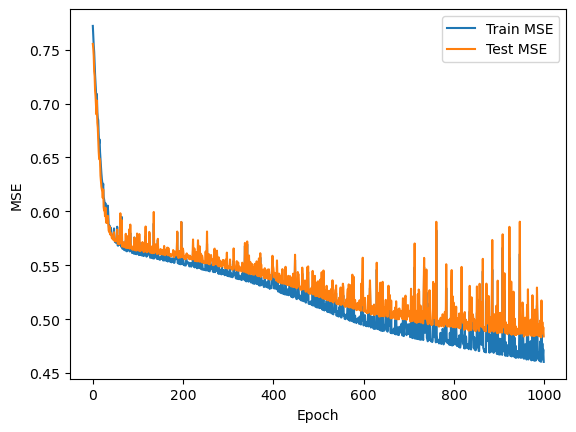

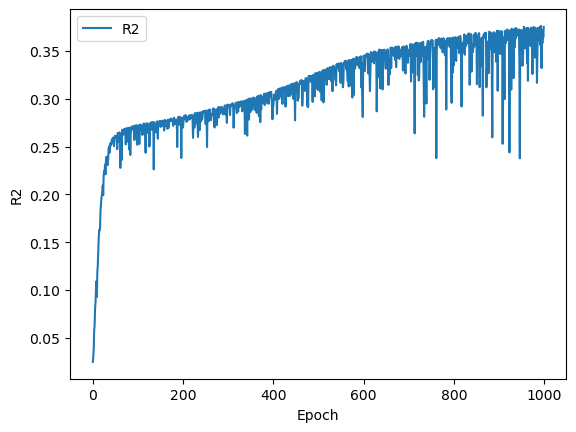

([(array([[-0.50408947,  0.44805307, -0.13017332, ..., -0.55430079,
           -0.21334604,  0.26589234],
          [ 0.45665068,  0.3227143 , -0.04266832, ..., -0.1013417 ,
            0.39822404,  0.74013358],
          [-0.40784698, -0.03617332, -0.09645947, ...,  0.11042988,
            0.67296318,  0.9754239 ],
          ...,
          [-0.24300029,  0.28434917,  0.49271558, ..., -0.5159569 ,
           -0.38992539,  0.24676883],
          [-0.07243301, -0.58724158, -0.34249671, ..., -0.46650361,
            0.74123931,  0.17954603],
          [-0.23911976,  0.21279012, -0.28049056, ...,  0.1894408 ,
           -0.06228312,  0.32387312]]),
   array([ 0.01617491, -0.01112794, -0.00585678, -0.01591419, -0.03383101,
          -0.0431451 , -0.00402106,  0.03901321, -0.01010656,  0.05306845,
           0.00164386, -0.13296977, -0.01993755,  0.12509664,  0.0393587 ,
           0.01583086, -0.01600818, -0.30120293,  0.00461446, -0.06483023,
           0.00649789, -0.06143478, -0.0133345 

In [361]:


#activation_funcs = [ReLU, ReLU, ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
#activation_ders = [ReLU_der, ReLU_der, ReLU_der, lambda x: np.ones_like(x)]

network_input_size = 11

activation_funcs = [sigmoid, sigmoid, sigmoid, lambda x: x]  
activation_ders = [sigmoid_der, sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

layer_output_sizes = [128, 64, 32, 1]
learning_rate = 0.01
epochs = 1000
train_batch_size = 100  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=18):
    train_MSE = []
    test_MSE = []
    R = []
    

    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        #Computing accuracies and predictions
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_MSE.append(train_mse) 
        test_MSE.append(test_mse)
        r2 = 1 - test_mse / np.var(y_test)
        R.append(r2)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}, R2: {r2:.4f}")

        
    
    # Plot MSE
    plt.plot(train_MSE, label='Train MSE')
    plt.plot(test_MSE, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Plot R2
    plt.plot(R, label='R2')
    plt.xlabel('Epoch')
    plt.ylabel('R2')
    plt.legend()
    plt.show()
    
    return layers, train_MSE, test_MSE

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [362]:
"""
#Gradient verification with autograd

verify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print("Backprop =",verify_grad[-1][0])


#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)

cost_grad = grad(cost, 1)
autoG = cost_grad(x_train, layers, activation_funcs, y_train)

print("Autograd =",autoG)
print("Backprop =",verify_grad)

diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")
"""



'\n#Gradient verification with autograd\n\nverify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)\nprint("Backprop =",verify_grad[-1][0])\n\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]\n    return mse(predict, y_train)\n\ncost_grad = grad(cost, 1)\nautoG = cost_grad(x_train, layers, activation_funcs, y_train)\n\nprint("Autograd =",autoG)\nprint("Backprop =",verify_grad)\n\ndiff = 0\nfor i in range(len(computed)):\n    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])\nif diff <= 10**-6:\n    print("Same gradients")\n'